# Generate example images

In [76]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
# %load ../common_.py
import sys
sys.path.append("..")
from common import *

In [78]:
import zarr
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, Normalize

In [79]:
data_dir = Path(os.environ["VSC_DATA_VO_USER"]) / "datasets/weizmann/EhV/v2/results/scip/202202071958/"

In [80]:
df = pq.read_table(data_dir / "features.parquet").to_pandas()
cat_type = CategoricalDtype(categories=sorted(df["meta_group"].astype(int).unique()), ordered=True)
df["meta_group"] = df["meta_group"].astype(int).astype(cat_type)
df["meta_replicate"] = df["meta_replicate"].astype(int)
df = df.set_index(["meta_type", "meta_object_number", "meta_replicate", "meta_suffix", "meta_group"])
df = df[numpy.load(data_dir / "indices/columns.npy", allow_pickle=True)]
df = df.loc[numpy.load(data_dir / "indices/iso.npy", allow_pickle=True)]
df = df[df["meta_label"] != "unknown"]
df["meta_label"] = pandas.Categorical(df["meta_label"], categories=["mcp-_psba+", "mcp+_psba+", "mcp+_psba-", "mcp-_psba-"], ordered=True)
df.shape

(103775, 914)

In [168]:
channels = [4, 1, 6, 0, 3]
cmaps = [
    LinearSegmentedColormap.from_list("test", [(0,0,0,1), (227/N, 161/N, 220/N, 1)]), # dapi
    LinearSegmentedColormap.from_list("test", [(0,0,0,1), (228/N, 204/N, 7/N, 1)]), # mcp
    LinearSegmentedColormap.from_list("test", [(0,0,0,1), (220/N, 41/N, 41/N, 1)]), # psba
    "Greys",
    "Greys"
]
norms = [
    Normalize(vmin=df["feat_min_DAPI"].quantile(0), vmax=df["feat_max_DAPI"].quantile(0.95)),
    Normalize(vmin=df["feat_min_TMR"].quantile(0), vmax=df["feat_max_TMR"].quantile(0.95)),
    Normalize(vmin=df["feat_min_Cy5"].quantile(0), vmax=df["feat_max_Cy5"].quantile(0.95)),
    Normalize(vmin=df["feat_min_BF1"].quantile(0.1), vmax=df["feat_max_BF1"].quantile(0.8)),
    Normalize(vmin=df["feat_min_SSC"].quantile(0.1), vmax=df["feat_max_SSC"].quantile(0.4))
]

In [166]:
r = df.sort_values("feat_max_Cy5", ascending=False).iloc[1350]

z = zarr.open(r.meta_path)

pixels = z[r.meta_zarr_idx]
pixels = pixels.reshape(z.attrs["shape"][r.meta_zarr_idx])[channels]
minr, minc, maxr, maxc = int(r["meta_bbox_minr"]), int(r["meta_bbox_minc"]), int(r["meta_bbox_maxr"]), int(r["meta_bbox_maxc"])

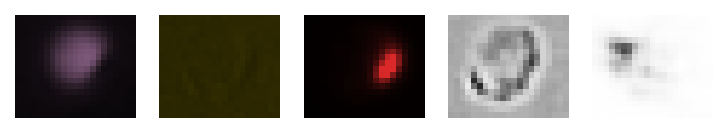

In [167]:
fig, axes = plt.subplots(1, 5, dpi=150)
for cmap, norm, p, ax in zip(cmaps, norms, pixels, axes):
    ax.imshow(p[minr:maxr, minc:maxc], cmap=cmap, norm=norm)
    ax.set_axis_off()
plt.savefig(data_dir / "figures/healthy_cell.svg")

In [169]:
r = df.sort_values("feat_max_TMR", ascending=False).iloc[1350]

z = zarr.open(r.meta_path)

pixels = z[r.meta_zarr_idx]
pixels = pixels.reshape(z.attrs["shape"][r.meta_zarr_idx])[channels]
minr, minc, maxr, maxc = int(r["meta_bbox_minr"]), int(r["meta_bbox_minc"]), int(r["meta_bbox_maxr"]), int(r["meta_bbox_maxc"])

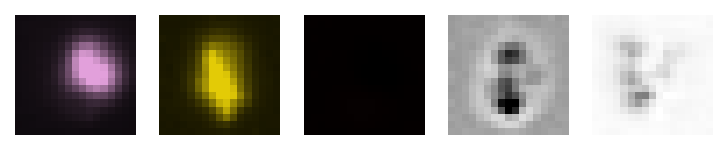

In [170]:
fig, axes = plt.subplots(1, 5, dpi=150)
for cmap, norm, p, ax in zip(cmaps, norms, pixels, axes):
    ax.imshow(p[minr:maxr, minc:maxc], cmap=cmap, norm=norm)
    ax.set_axis_off()
plt.savefig(data_dir / "figures/infected_cell.svg")